# National Achievement Survey Analysis

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib as mpl  
import matplotlib.cm as cm 
import matplotlib.pyplot as plt


In [31]:
marks=pd.read_csv("nas-pupil-marks.csv") #load dataset
marks.head()


,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33


In [32]:
marks.shape

(185348, 64)

In [33]:
marks.count()  #counting no of not null values

STUID                     185348
State                     185348
District                  185348
Gender                    185348
Age                       185348
Category                  185348
Same language             185348
Siblings                  185348
Handicap                  185348
Father edu                185348
Mother edu                185348
Father occupation         185348
Mother occupation         185348
Below poverty             185348
Use calculator            185348
Use computer              166186
Use Internet              185348
Use dictionary            185348
Read other books          185348
# Books                   185348
Distance                  185348
Computer use              185348
Library use               185348
Like school               185348
Subjects                  185348
Give Lang HW              185348
Give Math HW              185348
Give Scie HW              185348
Give SoSc HW              185348
Correct Lang HW           185348
          

In [34]:
marks.columns

Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same language', 'Siblings', 'Handicap', 'Father edu', 'Mother edu',
       'Father occupation', 'Mother occupation', 'Below poverty',
       'Use calculator', 'Use computer', 'Use Internet', 'Use dictionary',
       'Read other books', '# Books', 'Distance', 'Computer use',
       'Library use', 'Like school', 'Subjects', 'Give Lang HW',
       'Give Math HW', 'Give Scie HW', 'Give SoSc HW', 'Correct Lang HW',
       'Correct Math HW', 'Correct Scie HW', 'Correct SocS HW',
       'Help in Study', 'Private tuition', 'English is difficult',
       'Read English', 'Dictionary to learn', 'Answer English WB',
       'Answer English aloud', 'Maths is difficult', 'Solve Maths',
       'Solve Maths in groups', 'Draw geometry', 'Explain answers',
       'SocSci is difficult', 'Historical excursions', 'Participate in SocSci',
       'Small groups in SocSci', 'Express SocSci views',
       'Science is difficult', 'Observe e

 # Detecting and deleting Duplicates

In [35]:
duplicates=marks[marks.duplicated()] #detecting number of duplicates
duplicates.shape

(16, 64)

In [36]:
marks=marks.drop_duplicates() #deleting duplicates
marks.shape

(185332, 64)

In [37]:
marks.dtypes   

STUID                       int64
State                      object
District                    int64
Gender                      int64
Age                         int64
Category                    int64
Same language               int64
Siblings                    int64
Handicap                    int64
Father edu                  int64
Mother edu                  int64
Father occupation           int64
Mother occupation           int64
Below poverty               int64
Use calculator              int64
Use computer               object
Use Internet                int64
Use dictionary              int64
Read other books            int64
# Books                     int64
Distance                    int64
Computer use                int64
Library use                 int64
Like school                 int64
Subjects                   object
Give Lang HW                int64
Give Math HW                int64
Give Scie HW                int64
Give SoSc HW                int64
Correct Lang H

 ## checking for object types and  formatting them

In [39]:
arr=marks.dtypes=="object"
marks.columns[arr]

Index(['State', 'Use computer', 'Subjects'], dtype='object')

In [40]:
marks['Use computer'] = marks['Use computer'].map({"Yes":1,"No":0})
marks['Subjects'] = marks['Subjects'].map({'L':1, 'S':2, 'O':3, 'M':4, '0':0})
marks['Use computer'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Use computer, dtype: float64

# Handling NANs

In [41]:
marks.isnull().sum()

STUID                         0
State                         0
District                      0
Gender                        0
Age                           0
Category                      0
Same language                 0
Siblings                      0
Handicap                      0
Father edu                    0
Mother edu                    0
Father occupation             0
Mother occupation             0
Below poverty                 0
Use calculator                0
Use computer              19158
Use Internet                  0
Use dictionary                0
Read other books              0
# Books                       0
Distance                      0
Computer use                  0
Library use                   0
Like school                   0
Subjects                      0
Give Lang HW                  0
Give Math HW                  0
Give Scie HW                  0
Give SoSc HW                  0
Correct Lang HW               0
                          ...  
Private 

####  Note: removal of nan values can affect the analysis due to presence of 90000 nans in maths reading science so filling is prefereed

In [42]:
#marks=marks[(marks["Maths %"].notnull())&(marks["Reading %"].notnull())&(marks["Science %"].notnull())&(marks["Social %"].notnull())]
#marks.shape

In [45]:
marks.head()

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33


In [47]:
marks.fillna(marks.mean(),inplace=True)
marks.head()

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.370000,46.210289,27.78000,38.357906
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.960000,46.210289,38.18000,38.357906
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.780000,70.000000,36.41447,38.357906
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,32.241759,56.670000,36.41447,36.000000
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,32.241759,46.210289,14.55000,8.330000


# How do boys and girls perform across states?

In [16]:
#grp=marks.pivot_table(marks,columns=["Maths %","Reading %","Science %","Social %"],aggfunc="mean")
#grp.shape

(487340,)

In [48]:
marks["performance"]=marks["Maths %"]+marks["Reading %"]+marks["Science %"]+marks["Social %"]
marks.head()

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %,performance
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,4,3,4,4,20.370000,46.210289,27.78000,38.357906,132.718195
1,11011001002,AP,1,2,3,4,2,5,2,2,...,4,4,3,4,4,12.960000,46.210289,38.18000,38.357906,135.708195
2,11011001003,AP,1,2,3,4,2,5,2,1,...,4,3,3,4,4,27.780000,70.000000,36.41447,38.357906,172.552376
3,11011001004,AP,1,2,3,3,2,4,2,1,...,4,3,3,4,4,32.241759,56.670000,36.41447,36.000000,161.326229
4,11011001005,AP,1,2,3,3,2,5,2,1,...,2,3,3,4,4,32.241759,46.210289,14.55000,8.330000,101.332048


In [50]:
pivot=marks.pivot_table("performance",index=["State"],columns=["Gender"], aggfunc ="mean")
del pivot[0]
pivot.head()

Gender,1,2
State,,
AN,150.576612,155.178430
AP,145.964786,146.576969
AR,147.988061,146.437914
BR,156.635622,152.468987
CG,149.704979,148.822198


In [51]:
pivot.columns=["Boy","Girl"]
pivot.head()

,Boy,Girl
State,,
AN,150.576612,155.178430
AP,145.964786,146.576969
AR,147.988061,146.437914
BR,156.635622,152.468987
CG,149.704979,148.822198


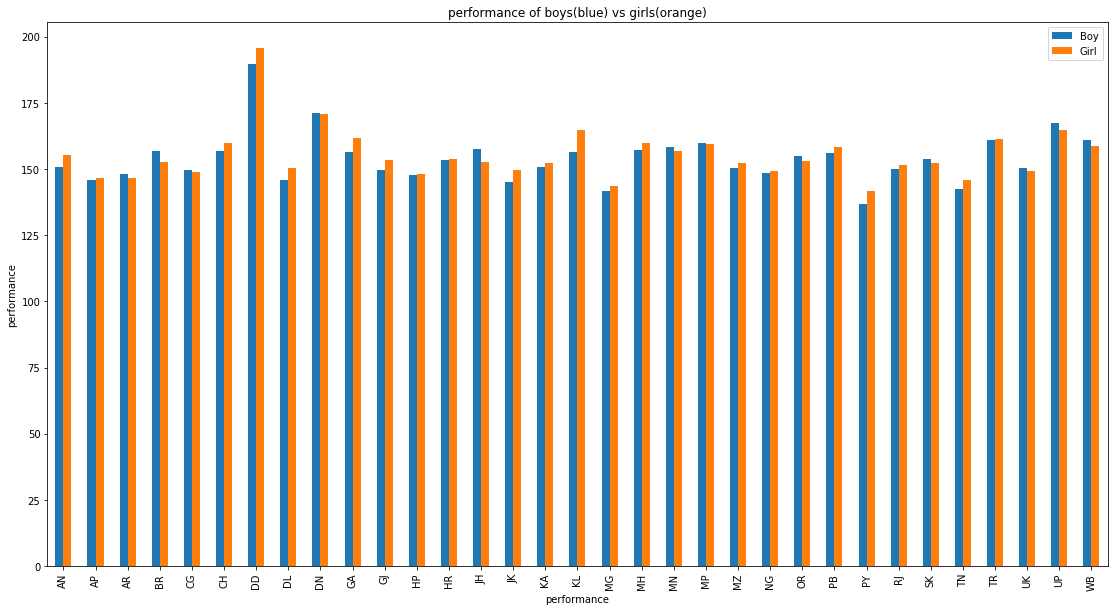

In [111]:
pivot.plot(kind="bar",figsize=(19, 10))
plt.xlabel("performance")
plt.ylabel("Performance")
plt.title("Performance of boys(blue) vs girls(orange)")
plt.show()

Ans: Girls perform Better

# Does southindian excel at math and science ?

In [112]:
set(marks.State.values)


['JK',
 'MN',
 'KA',
 'UK',
 'NG',
 'CH',
 'AN',
 'PB',
 'HP',
 'GJ',
 'RJ',
 'CG',
 'SK',
 'JH',
 'AR',
 'DD',
 'AP',
 'UP',
 'DN',
 'DL',
 'PY',
 'WB',
 'MP',
 'BR',
 'KL',
 'TR',
 'MH',
 'MG',
 'OR',
 'GA',
 'MZ',
 'HR',
 'TN']

In [54]:
south=["AP","TN","KL","KA","PY"]  #dividing states as south and rest of india
rest=['AN',  'AR', 'BR', 'CG', 'CH', 'DD', 'DL', 'DN', 'GA','GJ', 'HP', 'HR',
      'JH', 'JK',  'MG', 'MH', 'MN', 'MP', 'MZ', 'NG', 'OR', 'PB',  'RJ', 'SK',  'TR', 'UK','UP', 'WB']

In [55]:
marks["MSc"]=marks["Maths %"]+marks["Science %"] #perecentage of marks in maths and science MSc


In [56]:
excel=marks.pivot_table("MSc",index=["State"], aggfunc ="mean") #seperating states and marks in maths&science in dataframe
excel

,MSc
State,
AN,70.395622
AP,65.253491
AR,65.869568
BR,70.798027
CG,65.624578
CH,66.637046
DD,86.847535
DL,64.524405
DN,81.816707


In [113]:
excel.head()


,MSc
State,
AN,70.395622
AP,65.253491
AR,65.869568
BR,70.798027
CG,65.624578


In [59]:
southper=excel[(excel.index=="AP")+(excel.index=="KA")+(excel.index=="PY")+(excel.index=="TN")]
southper

,MSc
State,
AP,65.253491
KA,67.574100
PY,62.138698
TN,64.195548


In [114]:
restper=excel[~(excel.index=="AP")+(excel.index=="KA")+(excel.index=="PY")+(excel.index=="TN")]
restper.head()

,MSc
State,
AN,70.395622
AR,65.869568
BR,70.798027
CG,65.624578
CH,66.637046


# plotting

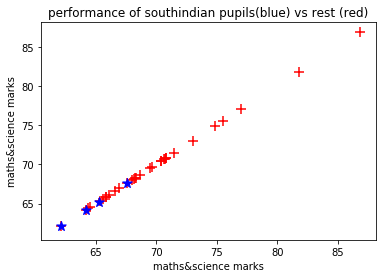

In [94]:
a=southper.MSc
b=southper.MSc
c=restper.MSc
d=restper.MSc
plt.scatter(c,d,color="Red",marker="+", s=100)
plt.scatter(a,b,color="Blue",marker="*", s=100)
plt.xlabel("maths&science marks")
plt.ylabel("maths&science marks")
plt.title("performance of southindian pupils(blue) vs rest (red)")
plt.show()

# ans : NO